In [87]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler # Z-score variables
from sklearn.preprocessing import MinMaxScaler # Min-Max Normalization

from sklearn.model_selection import train_test_split # simple TT split cv

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [88]:
# importing sub 1 box select data
sub_I_1_1_box_select_DF = pd.read_csv("../Data/Sub1/Instructional/session_I_BoxSelect_subjID_1_04-14-23_02-31-07.csv")
sub_I_1_1_box_select_DF.drop(sub_I_1_1_box_select_DF[(sub_I_1_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_1_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_1_1_box_select_DF.insert(0, 'participant_num', 1)
sub_I_1_1_box_select_DF.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
1036,1,119.035515,14:31:22:77,0,1,0,0.328,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,1,119.048981,14:31:22:91,0,1,0,0.935,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,1,119.062691,14:31:22:104,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,1,119.076790,14:31:22:119,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,1,119.090515,14:31:22:132,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# importing sub 2 box select data
sub_I_2_1_box_select_DF = pd.read_csv("../Data/Sub2/Instructional/session_I_BoxSelect_subjID_2_04-14-23_03-56-33.csv")
sub_I_2_1_box_select_DF.drop(sub_I_2_1_box_select_DF[(sub_I_2_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_2_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_2_1_box_select_DF.insert(0, 'participant_num', 2)
sub_I_2_1_box_select_DF.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
173,2,113.924225,15:56:35:982,0,1,0,0.238,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,2,113.938019,15:56:35:996,0,1,0,0.583,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2,113.951836,15:56:36:10,0,1,0,0.882,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,2,113.965874,15:56:36:24,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,2,113.979774,15:56:36:37,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# importing sub 3 box select data
sub_I_3_1_box_select_DF = pd.read_csv("../Data/Sub3/Instructional/session_I_BoxSelect_subjID_3_04-28-23_02-27-00.csv")
sub_I_3_1_box_select_DF.drop(sub_I_3_1_box_select_DF[(sub_I_3_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_3_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_3_1_box_select_DF.insert(0, 'participant_num', 3)
sub_I_3_1_box_select_DF.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
552,3,75.415710,14:27:8:624,0,1,0,0.749,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,3,75.429581,14:27:8:638,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,3,75.443306,14:27:8:652,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,3,75.457474,14:27:8:666,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,3,75.471214,14:27:8:680,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# importing sub 4 box select data
sub_I_4_1_box_select_DF = pd.read_csv("../Data/Sub4/Instructional/session_I_BoxSelect_subjID_4_04-28-23_03-36-53.csv")
sub_I_4_1_box_select_DF.drop(sub_I_4_1_box_select_DF[(sub_I_4_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_4_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_4_1_box_select_DF.insert(0, 'participant_num', 4)
sub_I_4_1_box_select_DF.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
246,4,57.064152,15:36:57:28,0,1,0,0.329,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,4,57.077995,15:36:57:43,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,4,57.091949,15:36:57:56,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,4,57.105747,15:36:57:70,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,4,57.119892,15:36:57:84,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# importing sub 5 box select data
sub_I_5_1_box_select_DF = pd.read_csv("../Data/Sub5/Instructional/session_I_BoxSelect_subjID_5_04-28-23_04-37-13.csv")
sub_I_5_1_box_select_DF.drop(sub_I_5_1_box_select_DF[(sub_I_5_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_5_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_5_1_box_select_DF.insert(0, 'participant_num', 5)
sub_I_5_1_box_select_DF.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,...,object_type,object_translation_x,object_translation_y,object_translation_z,object_rotation_x,object_rotation_y,object_rotation_z,object_rotation_w,activity,Unnamed: 47
165,5,68.116631,16:37:16:252,0,1,0,0.054,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,5,68.130219,16:37:16:264,0,1,0,0.618,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,5,68.144295,16:37:16:279,0,1,0,0.618,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,5,68.158394,16:37:16:293,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,5,68.171997,16:37:16:307,0,1,0,1.000,1,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
print(sub_I_1_1_box_select_DF.shape)
print(sub_I_2_1_box_select_DF.shape)
print(sub_I_3_1_box_select_DF.shape)
print(sub_I_4_1_box_select_DF.shape)
print(sub_I_5_1_box_select_DF.shape)

(255, 49)
(258, 49)
(296, 49)
(299, 49)
(242, 49)


In [94]:
all_sub_box_select_DF = pd.concat([sub_I_1_1_box_select_DF, sub_I_2_1_box_select_DF, sub_I_3_1_box_select_DF, sub_I_4_1_box_select_DF, sub_I_5_1_box_select_DF])

In [95]:
print(all_sub_box_select_DF.shape)

(1350, 49)


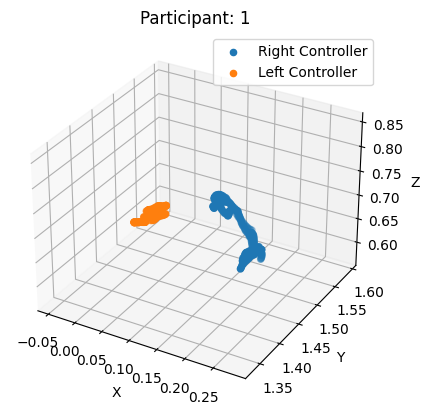

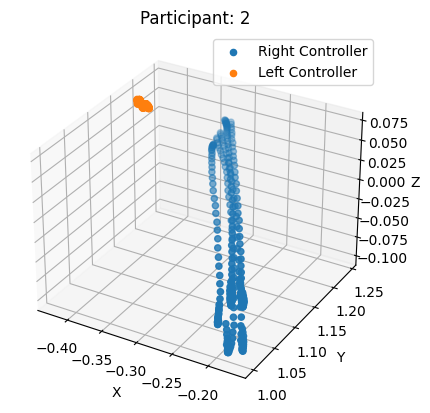

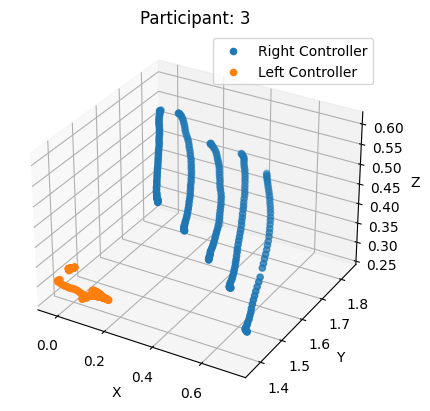

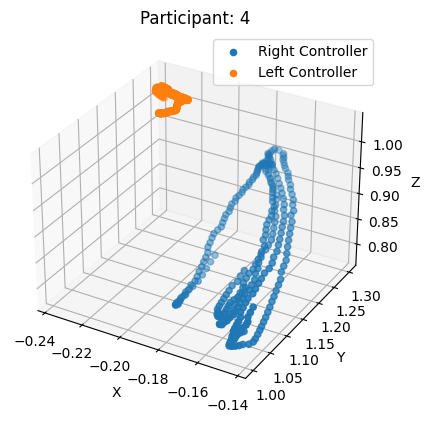

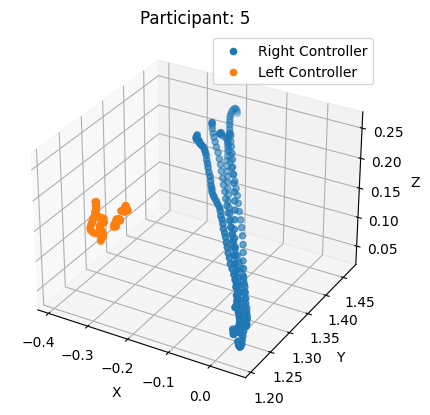

In [96]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()
    plt.show()

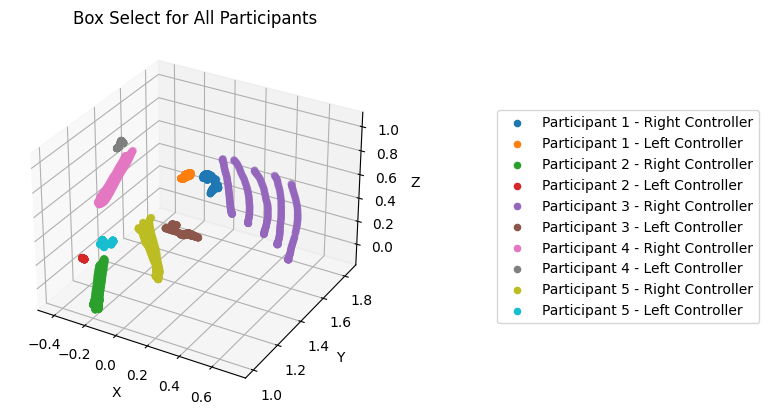

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Box Select for All Participants')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [98]:
# only counter variables in dataframe
counter = ["participant_num", "time", "absolute_time", "left_handed", "right_handed", "trigger_pull_amount_left", "trigger_pull_amount_right", "gesture_counter_UI", "x_pressed", "x_counter", "gesture_counter"]
all_sub_box_select_DF_counter = all_sub_box_select_DF[counter]
all_sub_box_select_DF_counter.head()

,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
1036,1,119.035515,14:31:22:77,0,1,0,0.328,1,False,0,1
1037,1,119.048981,14:31:22:91,0,1,0,0.935,1,False,0,1
1038,1,119.062691,14:31:22:104,0,1,0,1.000,1,False,0,1
1039,1,119.076790,14:31:22:119,0,1,0,1.000,1,False,0,1
1040,1,119.090515,14:31:22:132,0,1,0,1.000,1,False,0,1


In [99]:
all_sub_box_select_DF_counter.shape

(1350, 11)

In [100]:
translation = ["r_controller_translation_x", "r_controller_translation_y", "r_controller_translation_z", "l_controller_translation_x", "l_controller_translation_y", "l_controller_translation_z"]
all_sub_box_select_DF_translation = all_sub_box_select_DF[translation]

In [101]:
# normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(all_sub_box_select_DF_translation), columns=all_sub_box_select_DF_translation.columns)
df_normalized.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0.404175,0.682464,0.670093,0.668359,0.979487,0.549281
1,0.405123,0.680095,0.671028,0.668359,0.982051,0.548255
2,0.406072,0.677725,0.671963,0.668359,0.984615,0.548255
3,0.407021,0.675355,0.673832,0.668359,0.984615,0.547228
4,0.407970,0.672986,0.675701,0.668359,0.987179,0.546201


In [102]:
df_normalized.shape

(1350, 6)

In [103]:
all_sub_box_select_DF_counter.insert(0, 'index', range(0, 0 + len(all_sub_box_select_DF_counter)))
all_sub_box_select_DF_counter.head()

,index,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
1036,0,1,119.035515,14:31:22:77,0,1,0,0.328,1,False,0,1
1037,1,1,119.048981,14:31:22:91,0,1,0,0.935,1,False,0,1
1038,2,1,119.062691,14:31:22:104,0,1,0,1.000,1,False,0,1
1039,3,1,119.076790,14:31:22:119,0,1,0,1.000,1,False,0,1
1040,4,1,119.090515,14:31:22:132,0,1,0,1.000,1,False,0,1


In [104]:
df_normalized.insert(0, 'index', range(0, 0 + len(df_normalized)))
df_normalized.head()

,index,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,0.404175,0.682464,0.670093,0.668359,0.979487,0.549281
1,1,0.405123,0.680095,0.671028,0.668359,0.982051,0.548255
2,2,0.406072,0.677725,0.671963,0.668359,0.984615,0.548255
3,3,0.407021,0.675355,0.673832,0.668359,0.984615,0.547228
4,4,0.407970,0.672986,0.675701,0.668359,0.987179,0.546201


In [105]:
merged_all_sub_box_select_DF = pd.merge(left=all_sub_box_select_DF_counter, right=df_normalized, left_on='index', right_on='index')
merged_all_sub_box_select_DF.head()

,index,participant_num,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,1,119.035515,14:31:22:77,0,1,0,0.328,1,False,0,1,0.404175,0.682464,0.670093,0.668359,0.979487,0.549281
1,1,1,119.048981,14:31:22:91,0,1,0,0.935,1,False,0,1,0.405123,0.680095,0.671028,0.668359,0.982051,0.548255
2,2,1,119.062691,14:31:22:104,0,1,0,1.000,1,False,0,1,0.406072,0.677725,0.671963,0.668359,0.984615,0.548255
3,3,1,119.076790,14:31:22:119,0,1,0,1.000,1,False,0,1,0.407021,0.675355,0.673832,0.668359,0.984615,0.547228
4,4,1,119.090515,14:31:22:132,0,1,0,1.000,1,False,0,1,0.407970,0.672986,0.675701,0.668359,0.987179,0.546201


In [106]:
merged_all_sub_box_select_DF.shape

(1350, 18)

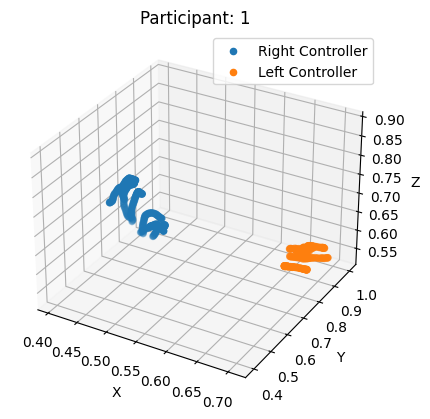

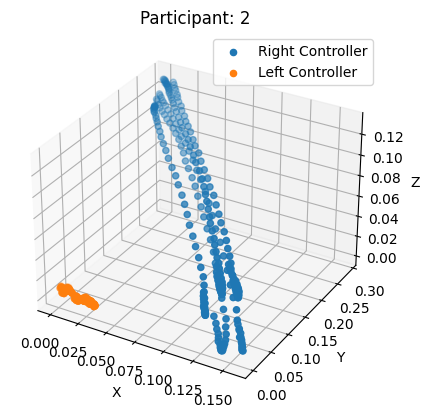

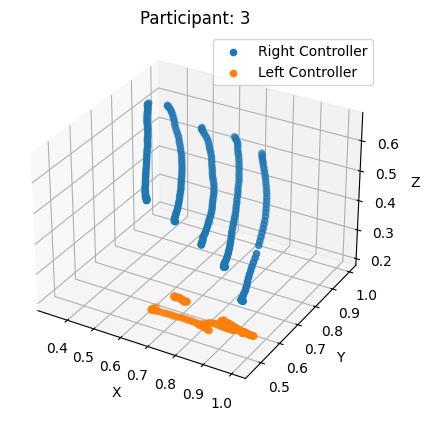

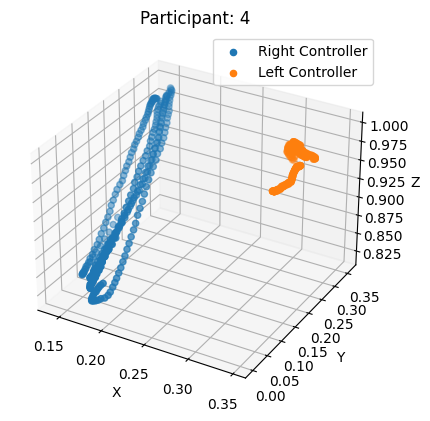

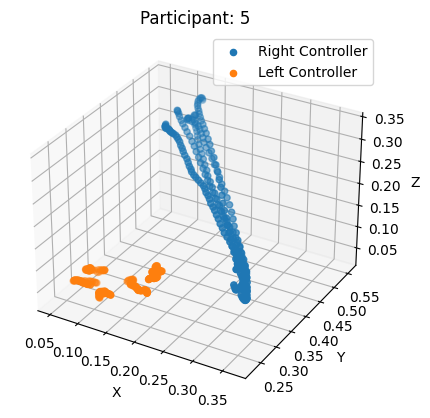

In [107]:
grouped_by_participant = merged_all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()
    plt.show()

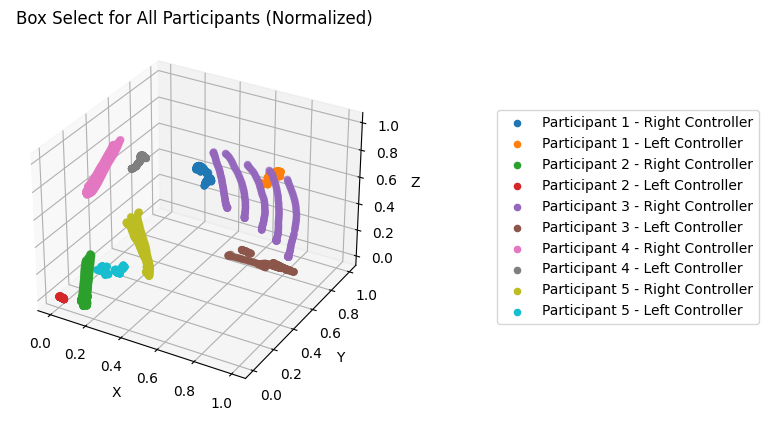

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = merged_all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Box Select for All Participants (Normalized)')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()